In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Let's see the list the list of datasets provided by Seaborn

sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

### We'll the `flight` dataset for the tutorial.

In [3]:
df = sns.load_dataset('flights')
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


### Let's make all the `date` elements to be contained in one column.

In [5]:

df = sns.load_dataset('flights')
df['yearMonth'] = pd.to_datetime("01-"+df['month'].astype(str)+"-"+df['year'].astype(str))
df.head()

,year,month,passengers,yearMonth
0,1949,Jan,112,1949-01-01
1,1949,Feb,118,1949-02-01
2,1949,Mar,132,1949-03-01
3,1949,Apr,129,1949-04-01
4,1949,May,121,1949-05-01


**Let's convert the year to index**

In [6]:
df = sns.load_dataset('flights')
df['yearMonth'] = pd.to_datetime("01-"+df['month'].astype(str)+"-"+df['year'].astype(str))
df.set_index('yearMonth',inplace=True)
df.head()

,year,month,passengers
yearMonth,,,
1949-01-01,1949,Jan,112
1949-02-01,1949,Feb,118
1949-03-01,1949,Mar,132
1949-04-01,1949,Apr,129
1949-05-01,1949,May,121


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 3.9 KB


<Axes: xlabel='yearMonth', ylabel='passengers'>

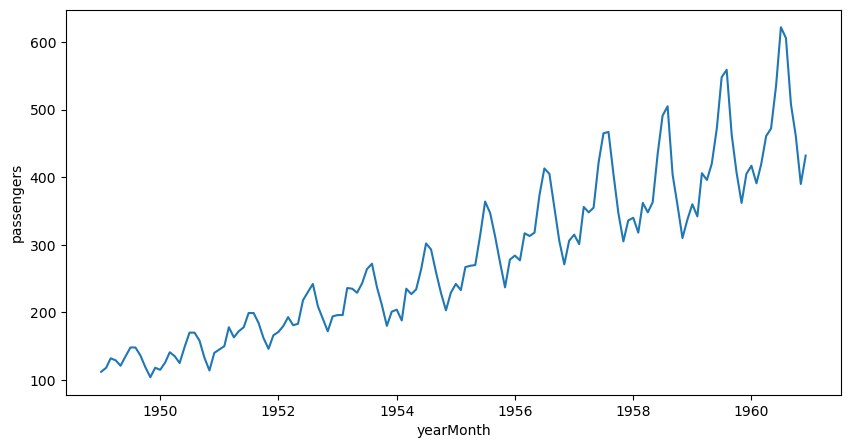

In [8]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x=df.index,y=df.passengers)

**We can see that the above output is of seasonal and trend type. We need to do some transformation to make the data stationary: This means that we need to make `the mean and the variance` constant over time but to be sure we'll use some methods to findout.**

# **1. Rolling Mean and Standard Deviation**

In [9]:
# Let's roll for 12 months

df['rollMean']  = df.passengers.rolling(window=12).mean()
df['rollStd']  = df.passengers.rolling(window=12).std()

<Axes: xlabel='yearMonth', ylabel='passengers'>

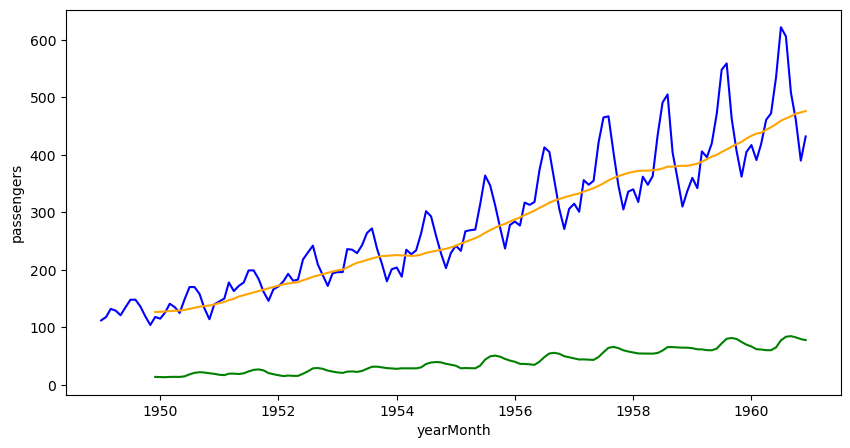

In [15]:
# Let's plot what we have.

plt.figure(figsize=(10,5))
sns.lineplot(data=df,x=df.index,y=df.passengers, color = 'blue')
sns.lineplot(data=df,x=df.index,y=df.rollMean, color = 'orange')
sns.lineplot(data=df,x=df.index,y=df.rollStd, color = 'green')

### From the above plot it is clear that our data is not stationary. Now let's proceed with the second method i.e. ADF test.

# **2. Augmented Dickey-Fuller (ADF) Test in Time Series Analysis**

#### **What is the ADF Test?**
The **Augmented Dickey-Fuller (ADF) test** is a statistical test used in time series analysis to determine whether a given time series is **stationary** or not. Stationarity is a key assumption for many time series models, including ARIMA, and it implies that the statistical properties of the series (mean, variance, and autocorrelation) do not change over time.

---

#### **Why is Stationarity Important?**
1. **Predictive Power**:
   - Stationary series are easier to model and forecast because their behavior remains consistent over time.
2. **Suitability for ARIMA**:
   - ARIMA models require the data to be stationary to ensure reliable parameter estimation and forecasting.
3. **Statistical Inference**:
   - Many statistical tests and models assume stationarity for valid results.

---

#### **ADF Test Hypotheses**
The test evaluates the presence of a **unit root**, which indicates non-stationarity:

1. **Null Hypothesis (\(H_0\))**:
   - The time series has a **unit root** (i.e., it is **non-stationary**).
   - The series needs differencing to become stationary.

2. **Alternative Hypothesis (\(H_1\))**:
   - The time series does **not** have a unit root (i.e., it is **stationary**).

---

#### **Test Procedure**
The ADF test extends the **Dickey-Fuller test** by including lagged differences of the series to account for higher-order autocorrelation. 

---

#### **Key Parameters and Options**
1. **Trend Inclusion**:
   - ADF allows testing with a constant (\(\alpha\)), trend (\(\beta t\)), or neither.
2. **Lag Length**:
   - The number of lags of the differenced terms is chosen to remove autocorrelation in residuals.
   - Often determined using criteria like AIC or BIC.

---

#### **Interpreting the Results**
1. **ADF Statistic**:
   - Compares the test statistic to critical values. If the statistic is less than the critical value, reject \(H_0\).
   - Lower values indicate stronger evidence against the null hypothesis (non-stationarity).

2. **P-value**:
   - A small p-value (e.g., \(<0.05\)) suggests rejecting \(H_0\), meaning the series is stationary.

3. **Critical Values**:
   - These are thresholds for decision-making, depending on the confidence level (1%, 5%, 10%).

---

#### **Example Output Interpretation**
Suppose the ADF test results are as follows:

| Statistic       | Value   |
|------------------|---------|
| ADF Statistic    | -3.456  |
| p-value          | 0.015   |
| Critical Values  | 1%: -3.500, 5%: -2.890, 10%: -2.580 |

- **ADF Statistic (-3.456)** is less than the 5% critical value (-2.890), and the **p-value (0.015)** is less than 0.05.
- **Conclusion**: Reject \(H_0\); the series is stationary.

---

#### **Practical Considerations**
1. **Non-Stationary Data**:
   - If the series is non-stationary, apply transformations like **differencing**, **logarithms**, or **seasonal adjustments** to achieve stationarity.
2. **Seasonality**:
   - ADF does not inherently account for seasonality. For seasonal series, use tests like the **HEGY test** or apply seasonal differencing first.

---

#### **Limitations of the ADF Test**
1. **Low Power**:
   - The test may fail to detect stationarity for short datasets.
2. **Assumptions**:
   - It assumes linearity and may not handle complex non-stationarity patterns well.
3. **Seasonality**:
   - Does not explicitly test for seasonal unit roots.

---

#### **Conclusion**
The ADF test is an essential tool for time series analysis. It provides a formal mechanism to check for stationarity, guiding decisions about differencing or model selection. However, its results should be combined with visual inspection (like plots of the series and autocorrelation functions) for robust conclusions.

In [16]:
# Let's import ADF

from statsmodels.tsa.stattools import adfuller

In [17]:
adfTest = adfuller(df['passengers'],autolag='AIC',)
adfTest

(0.8153688792060498,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

### From the above output we have two groups of output 

- **Test statistics:** 0.8153688792060498,
 0.991880243437641,
 13,
 130,

 - **Criticality:** {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598}

In [18]:
adfTest[0:4]

(0.8153688792060498, 0.991880243437641, 13, 130)

What do the above values represent? We are going to convert them into series to findout.

In [19]:
# Convwert to series

stats = pd.Series(adfTest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
stats

Test Statistic                   0.815369
p-value                          0.991880
#lags used                      13.000000
number of observations used    130.000000
dtype: float64

### We can clearly see what each value represents now. Next we consider the criticality by iterating through the dictionary.

In [20]:

for key, values in adfTest[4].items():
    print('criticality',key,":",values)

criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


# **Making Data Stationary**

### **Time Shift**, **Logs**, and **Square Roots/Cubes** as methods for making time series data stationary:

---

### 1. **Time Shift (Lagging)**

#### **What it is:**
- Time shifting involves moving data points forward or backward in time by a certain number of periods.
- Typically, this is used in conjunction with other techniques, like **differencing**, to compute changes between lagged observations.

#### **How it helps with stationarity:**
- Alone, time shifting doesn't directly make data stationary; however, when combined with differencing (e.g., subtracting lagged values), it removes trends and stabilizes the mean of the series.

#### **When to use:**
- When you suspect that differences between observations (e.g., consecutive or seasonal lags) are more stable than the raw data.

#### **Example:**
In Python:
```python
# Creating a lag of 1 time step
df['lagged'] = df['value'].shift(1)

# Differencing with a lag of 1
df['differenced'] = df['value'] - df['value'].shift(1)
```

---

### 2. **Log Transformation**

#### **What it is:**
- A mathematical transformation where you apply the natural logarithm (\( \log \)) to the values in your time series.

#### **How it helps with stationarity:**
- Reduces variance and stabilizes the data by compressing large values and amplifying smaller ones.
- It is particularly useful when the variance grows exponentially over time or when data shows a multiplicative trend.

#### **When to use:**
- When your data exhibits exponential growth or heteroscedasticity (i.e., variance increases with the mean).

#### **Limitations:**
- Cannot be applied to data with zero or negative values since the logarithm of such numbers is undefined.

#### **Example:**
In Python:
```python
import numpy as np
# Apply log transformation
df['log_value'] = np.log(df['value'])
```

---

### 3. **Square Root and Cube Root Transformations**

#### **What they are:**
- These transformations involve applying the square root (\( \sqrt{x} \)) or cube root (\( \sqrt[3]{x} \)) to the time series values.

#### **How they help with stationarity:**
- Like log transformations, they reduce the magnitude of large values, which can stabilize variance.
- Unlike logs, these transformations can be applied to data with zeros or negatives (with cube roots), making them more flexible.

#### **When to use:**
- When the data has high variance or an increasing trend but contains zeros or negative values (use cube root for negatives).

#### **Limitations:**
- May not be as effective as differencing or log transformations for strongly trending or seasonal data.

#### **Examples:**
In Python:
```python
# Apply square root transformation
df['sqrt_value'] = np.sqrt(df['value'])

# Apply cube root transformation
df['cbrt_value'] = np.cbrt(df['value'])
```

---

### Summary Table

| **Method**               | **Purpose**                                       | **When to Use**                              | **Advantages**                                   | **Limitations**                                  |
|---------------------------|---------------------------------------------------|----------------------------------------------|-------------------------------------------------|-------------------------------------------------|
| **Time Shift (Lagging)**  | Aligns data or computes differences to remove trends. | When differencing is needed to remove trends or seasonality. | Useful in combination with differencing.        | Does not directly stabilize variance.           |
| **Log Transformation**    | Reduces large values and stabilizes variance.      | For exponential growth or heteroscedasticity. | Compresses wide data ranges effectively.        | Undefined for zero or negative values.          |
| **Square Root/Cube Root** | Stabilizes variance in data.                       | For data with zeros or negative values (use cube root). | Flexible with zero and negative values (cube).  | May not fully address strong trends or seasonality.|

---

These techniques are often combined with other methods, like **differencing**, to achieve stationarity and prepare time series data for further modeling.

### Note: You do not have to try out all these three methods, if any point `Time shift or Lag or Square Roor or Cube` if you find that your data is stattionry you can proceed with you analysis and prediction. You dont have to perform all three methods.

In [25]:

def test_stationarity(dataFrame, var):
    dataFrame['rollMean']  = dataFrame[var].rolling(window=12).mean()
    dataFrame['rollStd']  = dataFrame[var].rolling(window=12).std()
    
    from statsmodels.tsa.stattools import adfuller
    adfTest = adfuller(dataFrame[var],autolag='AIC')
    stats = pd.Series(adfTest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
    print(stats)
    
    for key, values in adfTest[4].items():
        print('criticality',key,":",values)
        
    sns.lineplot(data=df,x=df.index,y=df.passengers, color = 'blue')
    sns.lineplot(data=df,x=df.index,y=df.rollMean, color = 'orange')
    sns.lineplot(data=df,x=df.index,y=df.rollStd, color = 'green')

In [26]:
df.head()

,year,month,passengers,rollMean,rollStd
yearMonth,,,,,
1949-01-01,1949,Jan,112,NaN,NaN
1949-02-01,1949,Feb,118,NaN,NaN
1949-03-01,1949,Mar,132,NaN,NaN
1949-04-01,1949,Apr,129,NaN,NaN
1949-05-01,1949,May,121,NaN,NaN


Test Statistic                   0.815369
p-value                          0.991880
#lags used                      13.000000
number of observations used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


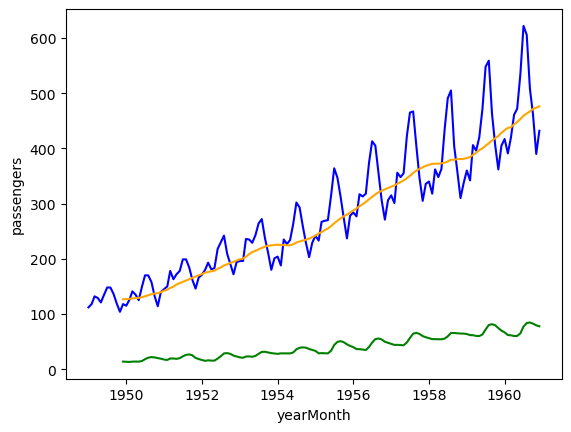

In [27]:
test_stationarity(df, 'passengers')

### Let's clean up our dataframe to only include the required data.

In [28]:

air_df = df[['passengers']]
air_df.head()


,passengers
yearMonth,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### We start with first method that we discussed which is `Time Shift`.

In [29]:
# time shift

air_df['shift'] = air_df.passengers.shift()

# Ler's find the difference by subtraction
air_df['shiftDiff'] = air_df['passengers'] - air_df['shift']
air_df.head()

/tmp/ipykernel_20655/2191060776.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_df['shift'] = air_df.passengers.shift()
/tmp/ipykernel_20655/2191060776.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_df['shiftDiff'] = air_df['passengers'] - air_df['shift']


,passengers,shift,shiftDiff
yearMonth,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,112.0,6.0
1949-03-01,132,118.0,14.0
1949-04-01,129,132.0,-3.0
1949-05-01,121,129.0,-8.0


### Let's check the stationarity of the data on the dataframe.

/tmp/ipykernel_20655/4022835097.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean']  = dataFrame[var].rolling(window=12).mean()
/tmp/ipykernel_20655/4022835097.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd']  = dataFrame[var].rolling(window=12).std()


Test Statistic                  -2.829267
p-value                          0.054213
#lags used                      12.000000
number of observations used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


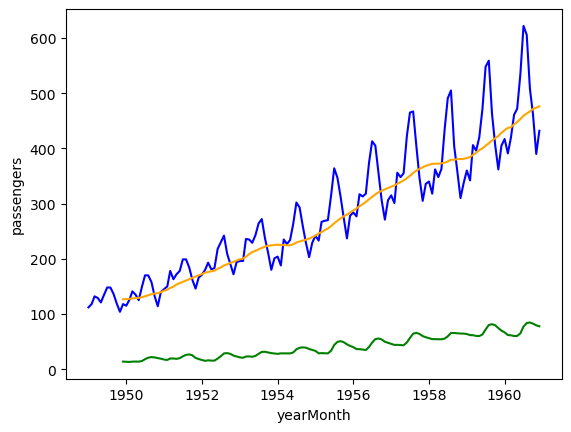

In [30]:
test_stationarity(air_df.dropna(),'shiftDiff')


### Let's do the log test

In [31]:
# Let's create another dataframe

log_df = df[['passengers']]

# Take the log of the column
log_df['log'] = np.log(log_df['passengers'])
log_df.head()

/tmp/ipykernel_20655/1083776790.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_df['log'] = np.log(log_df['passengers'])


,passengers,log
yearMonth,,
1949-01-01,112,4.718499
1949-02-01,118,4.770685
1949-03-01,132,4.882802
1949-04-01,129,4.859812
1949-05-01,121,4.795791


/tmp/ipykernel_20655/4022835097.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean']  = dataFrame[var].rolling(window=12).mean()
/tmp/ipykernel_20655/4022835097.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd']  = dataFrame[var].rolling(window=12).std()


Test Statistic                  -1.717017
p-value                          0.422367
#lags used                      13.000000
number of observations used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


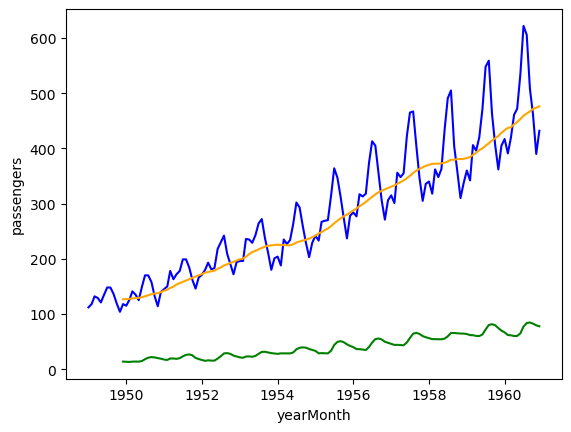

In [32]:
test_stationarity(log_df,'log')


### Let's proceed to Squaroot

In [33]:

sqrt_df = df[['passengers']]
sqrt_df['sqrt'] = np.sqrt(df['passengers'])
sqrt_df.head()

/tmp/ipykernel_20655/1614624390.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sqrt_df['sqrt'] = np.sqrt(df['passengers'])


,passengers,sqrt
yearMonth,,
1949-01-01,112,10.583005
1949-02-01,118,10.862780
1949-03-01,132,11.489125
1949-04-01,129,11.357817
1949-05-01,121,11.000000


/tmp/ipykernel_20655/4022835097.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean']  = dataFrame[var].rolling(window=12).mean()
/tmp/ipykernel_20655/4022835097.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd']  = dataFrame[var].rolling(window=12).std()


Test Statistic                  -0.345854
p-value                          0.918754
#lags used                      13.000000
number of observations used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


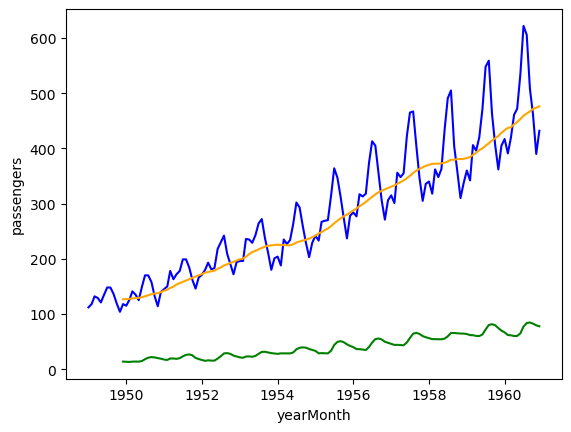

In [42]:
test_stationarity(sqrt_df,'sqrt')

In [35]:

cbrt_df = df[['passengers']]
cbrt_df['cbrt'] = np.cbrt(cbrt_df['passengers'])
cbrt_df.head()

/tmp/ipykernel_20655/3925773971.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cbrt_df['cbrt'] = np.cbrt(cbrt_df['passengers'])


,passengers,cbrt
yearMonth,,
1949-01-01,112,4.820285
1949-02-01,118,4.904868
1949-03-01,132,5.091643
1949-04-01,129,5.052774
1949-05-01,121,4.946087


/tmp/ipykernel_20655/4022835097.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean']  = dataFrame[var].rolling(window=12).mean()
/tmp/ipykernel_20655/4022835097.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd']  = dataFrame[var].rolling(window=12).std()


Test Statistic                  -0.810035
p-value                          0.816157
#lags used                      13.000000
number of observations used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


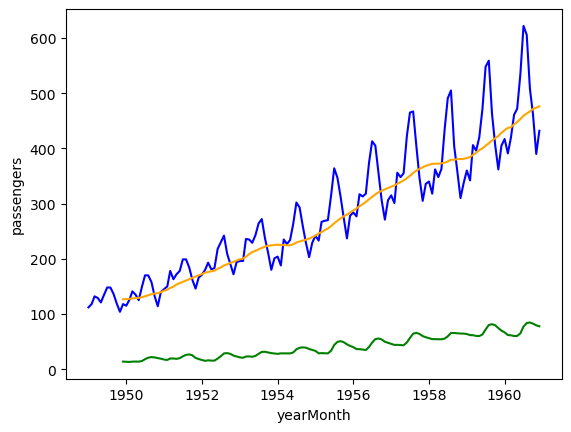

In [36]:
test_stationarity(cbrt_df,'cbrt')


### Let's see if we can combine `log` and `squaroot` method.

In [37]:

log_df2 = log_df[['passengers','log']]
log_df2['log_sqrt'] = np.sqrt(log_df['log'])

# let's take the difference
log_df2['logShiftDiff'] = log_df2['log_sqrt'] - log_df2['log_sqrt'].shift()
log_df2.head()

/tmp/ipykernel_20655/821786741.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_df2['log_sqrt'] = np.sqrt(log_df['log'])


,passengers,log,log_sqrt,logShiftDiff
yearMonth,,,,
1949-01-01,112,4.718499,2.172211,NaN
1949-02-01,118,4.770685,2.184190,0.011979
1949-03-01,132,4.882802,2.209706,0.025517
1949-04-01,129,4.859812,2.204498,-0.005208
1949-05-01,121,4.795791,2.189929,-0.014569


/tmp/ipykernel_20655/4022835097.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean']  = dataFrame[var].rolling(window=12).mean()
/tmp/ipykernel_20655/4022835097.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd']  = dataFrame[var].rolling(window=12).std()


Test Statistic                  -2.611019
p-value                          0.090741
#lags used                      14.000000
number of observations used    128.000000
dtype: float64
criticality 1% : -3.4825006939887997
criticality 5% : -2.884397984161377
criticality 10% : -2.578960197753906


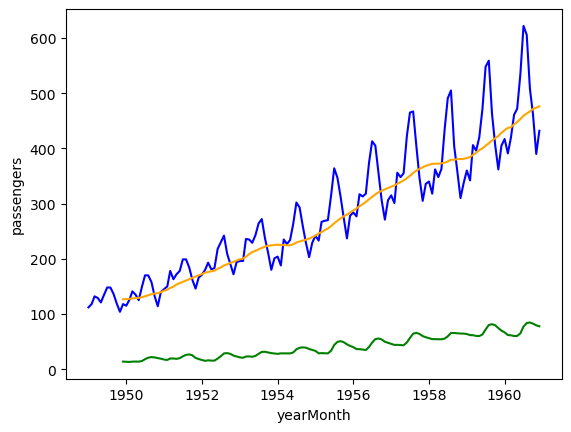

In [38]:
test_stationarity(log_df2.dropna(),'logShiftDiff')

### Let's do `log` and `shift` method

In [39]:

log_shift = df[['passengers']].copy(deep=True)
log_shift['log'] = np.log(log_shift['passengers'])
log_shift['logShift'] = log_shift['log'].shift()
log_shift['logShiftDiff'] = log_shift['log'] - log_shift['logShift']
log_shift.head()


,passengers,log,logShift,logShiftDiff
yearMonth,,,,
1949-01-01,112,4.718499,NaN,NaN
1949-02-01,118,4.770685,4.718499,0.052186
1949-03-01,132,4.882802,4.770685,0.112117
1949-04-01,129,4.859812,4.882802,-0.022990
1949-05-01,121,4.795791,4.859812,-0.064022


/tmp/ipykernel_20655/4022835097.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean']  = dataFrame[var].rolling(window=12).mean()
/tmp/ipykernel_20655/4022835097.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd']  = dataFrame[var].rolling(window=12).std()


Test Statistic                  -2.717131
p-value                          0.071121
#lags used                      14.000000
number of observations used    128.000000
dtype: float64
criticality 1% : -3.4825006939887997
criticality 5% : -2.884397984161377
criticality 10% : -2.578960197753906


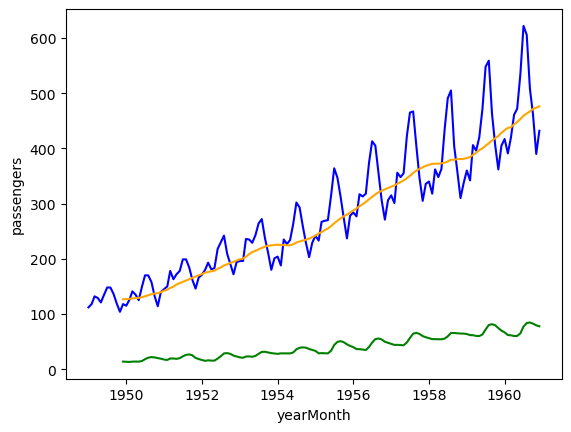

In [40]:
test_stationarity(log_shift.dropna(),'logShiftDiff')


# Next -2

In [43]:
# Create a deep copy of the 'passengers' column from 'df' to 'airP', ensuring it's independent from the original DataFrame.
airP = df[['passengers']].copy(deep=True)

airP['firstDiff'] = airP['passengers'].diff()

# Compute the 12-period difference of the 'passengers' column and store it in 'Diff12' (i.e., the difference between the current value and the value 12 periods ago).
airP['Diff12'] = airP['passengers'].diff(12)

In [44]:
airP.head()

,passengers,firstDiff,Diff12
yearMonth,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,NaN
1949-04-01,129,-3.0,NaN
1949-05-01,121,-8.0,NaN


### Start building the model

We need to find what the values of `p d q` will be.

In [45]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


### Let's check the correlation withe shifts

In [65]:
airP['firstDiff'].corr(airP['firstDiff'].shift(2))

-0.10444229359416496

### Let's use ACF and PACF to make things easier

Text(0, 0.5, 'Correlation Coefficient')

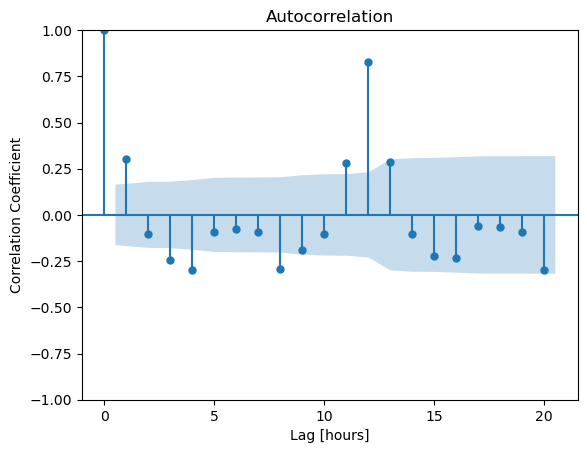

In [66]:
plot_acf(airP['firstDiff'].dropna(),lags=20);
plt.xlabel("Lag [hours]")
plt.ylabel("Correlation Coefficient")

Text(0, 0.5, 'Correlation Coefficient')

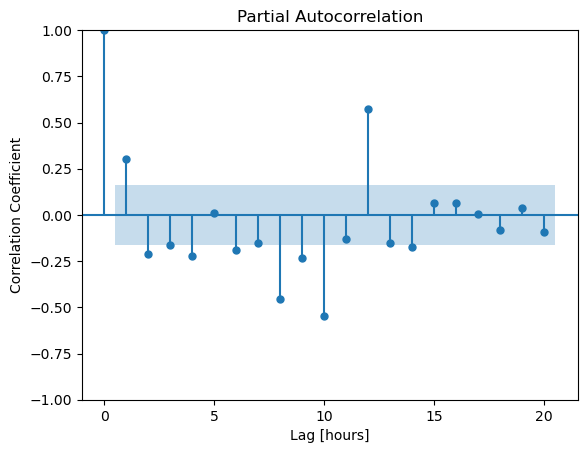

In [63]:
plot_pacf(airP['firstDiff'].dropna(),lags=20);
plt.xlabel("Lag [hours]")
plt.ylabel("Correlation Coefficient")

### From the above output we can see that the point `0` on x-axis to `1` on y-axis. This shows the highest possible corre;ation.

- `0` lag corresponds to `1` corr
- `1` lag corresponds to about `0.3`
- `1` lag corresponds to about `0.25`

**General note 2 lag points have the most impact `12th` hour and `1st` hour.**

For `plot_pacf` function, a **lag of 20** implies that the partial autocorrelation function (PACF) is being computed for the first 20 time lags (or time steps) in the data. 

### Explanation:
- **PACF**: The partial autocorrelation function measures the correlation between a time series and its lagged version, after removing the effects of shorter lags. It helps to identify the direct relationship between the current value and a specific past value, excluding indirect influences.
- **Lag**: A lag refers to the number of time periods by which a time series is shifted. For example, a lag of 1 refers to the correlation between the series and the previous time step, a lag of 2 refers to the correlation with the value two time steps ago, and so on.

By setting `lags=20`:
- The PACF is being plotted for the first 20 lags, i.e., it will show the partial autocorrelation values between `airP['firstDiff']` and its values from 1 to 20 time periods ago.
- This helps identify the most significant lags for model-building purposes, such as AR (AutoRegressive) terms in an ARIMA model.

### We'll be using p=1, q=3, and d=1 as suggested by our graph

In [48]:
train = airP[:round(len(airP)*70/100)]
test = airP[round(len(airP)*70/100):]
test.head()

,passengers,firstDiff,Diff12
yearMonth,,,
1957-06-01,422,67.0,48.0
1957-07-01,465,43.0,52.0
1957-08-01,467,2.0,62.0
1957-09-01,404,-63.0,49.0
1957-10-01,347,-57.0,41.0


In [ ]:
model = ARIMA(train['passengers'],order=(1,1,3))
model_fit = model.fit()
prediction = model_fit.predict(start=test.index[0],end=test.index[-1])
airP['arimaPred'] = prediction
airP.tail()

/home/chukwuemeka-james/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/chukwuemeka-james/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/chukwuemeka-james/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


,passengers,firstDiff,Diff12,arimaPred,sarimaxPred
yearMonth,,,,,
1960-08-01,606,-16.0,47.0,341.111333,598.353231
1960-09-01,508,-98.0,45.0,341.111333,533.984300
1960-10-01,461,-47.0,54.0,341.111333,478.758540
1960-11-01,390,-71.0,28.0,341.111333,431.404695
1960-12-01,432,42.0,27.0,341.111333,476.766857


<Axes: xlabel='yearMonth', ylabel='passengers'>

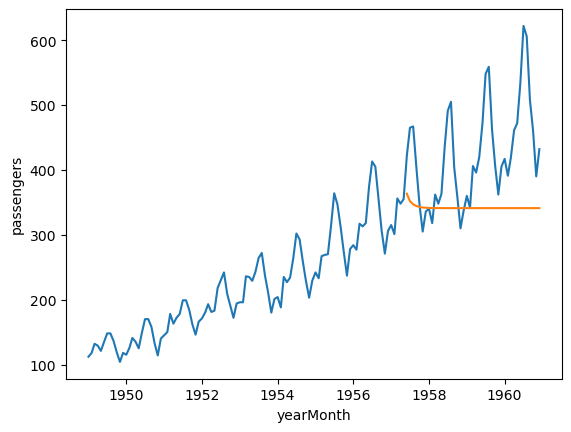

In [50]:
airP.dropna()
sns.lineplot(data=airP,x=airP.index,y='passengers')
sns.lineplot(data=airP,x=airP.index,y='arimaPred')

In [51]:
from sklearn.metrics import mean_squared_error


In [52]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


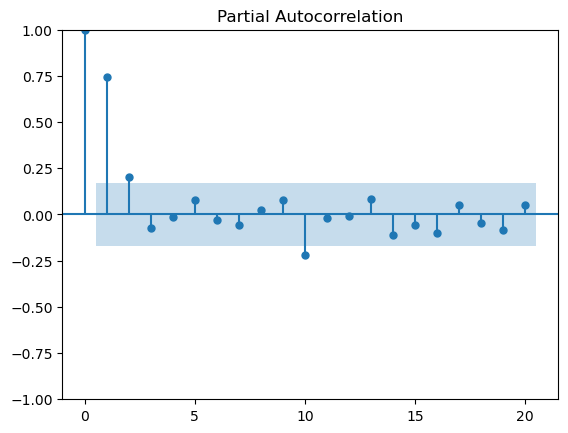

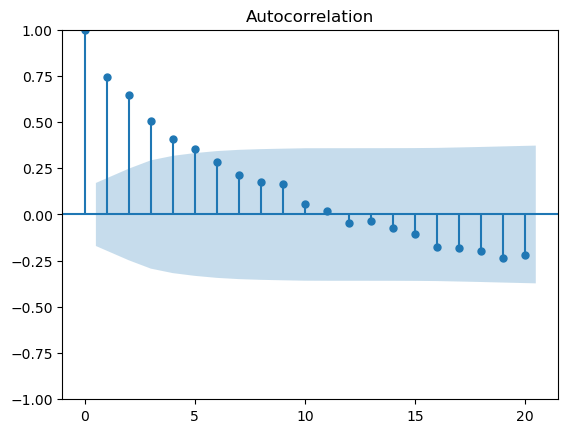

In [53]:
plot_pacf(airP['Diff12'].dropna(),lags=20);
plot_acf(airP['Diff12'].dropna(),lags=20);

In [54]:
model = SARIMAX(train['passengers'],order=(1,1,3),seasonal_order=(2,1,2,12))
model_fit = model.fit()
prediction = model_fit.predict(start=test.index[0],end=test.index[-1])
airP['sarimaxPred'] = prediction

/home/chukwuemeka-james/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/chukwuemeka-james/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/chukwuemeka-james/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.19903D+00    |proj g|=  2.00972D-01

At iterate    5    f=  3.16461D+00    |proj g|=  2.00487D-02

At iterate   10    f=  3.15881D+00    |proj g|=  5.62970D-03

At iterate   15    f=  3.14516D+00    |proj g|=  3.71066D-02

At iterate   20    f=  3.13315D+00    |proj g|=  2.33395D-02

At iterate   25    f=  3.12958D+00    |proj g|=  1.21133D-02

At iterate   30    f=  3.12904D+00    |proj g|=  9.87629D-04

At iterate   35    f=  3.12893D+00    |proj g|=  2.26762D-03

At iterate   40    f=  3.12885D+00    |proj g|=  4.34672D-04

At iterate   45    f=  3.12885D+00    |proj g|=  6.10530D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

<Axes: xlabel='yearMonth', ylabel='passengers'>

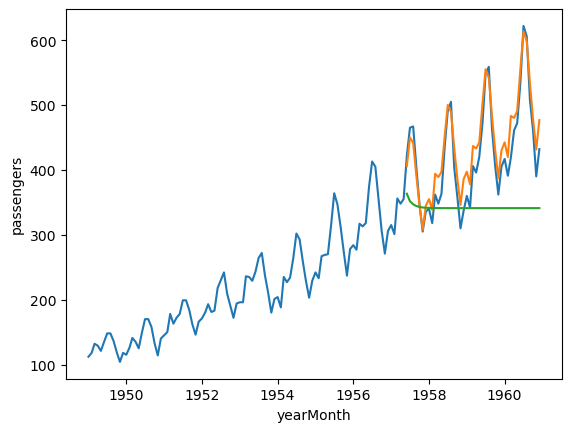

In [55]:
airP.dropna()
sns.lineplot(data=airP,x=airP.index,y='passengers')
sns.lineplot(data=airP,x=airP.index,y='sarimaxPred')
sns.lineplot(data=airP,x=airP.index,y='arimaPred')
# model_fit.predict(start=futureDate.index[0],end=futureDate.index[-1]).plot(color='black')

In [56]:
np.sqrt(mean_squared_error(test['passengers'],prediction))


27.47597915031576

In [57]:

futureDate = pd.DataFrame(pd.date_range(start='1961-01-01', end='1962-12-01',freq='MS'),columns=['Dates'])
futureDate.set_index('Dates',inplace=True)
futureDate.head()

""
Dates
1961-01-01
1961-02-01
1961-03-01
1961-04-01
1961-05-01


In [58]:
model_fit.predict(start=futureDate.index[0],end=futureDate.index[-1])


1961-01-01    490.589586
1961-02-01    465.057074
1961-03-01    532.843666
1961-04-01    530.133676
1961-05-01    541.960400
1961-06-01    612.593707
1961-07-01    674.600039
1961-08-01    657.105823
1961-09-01    588.114261
1961-10-01    528.837480
1961-11-01    478.537283
1961-12-01    526.590706
1962-01-01    541.477872
1962-02-01    513.090337
1962-03-01    585.172805
1962-04-01    582.897901
1962-05-01    595.857961
1962-06-01    671.869559
1962-07-01    737.981310
1962-08-01    718.344628
1962-09-01    644.884797
1962-10-01    581.667084
1962-11-01    528.529889
1962-12-01    579.178308
Freq: MS, Name: predicted_mean, dtype: float64

<Axes: xlabel='yearMonth', ylabel='passengers'>

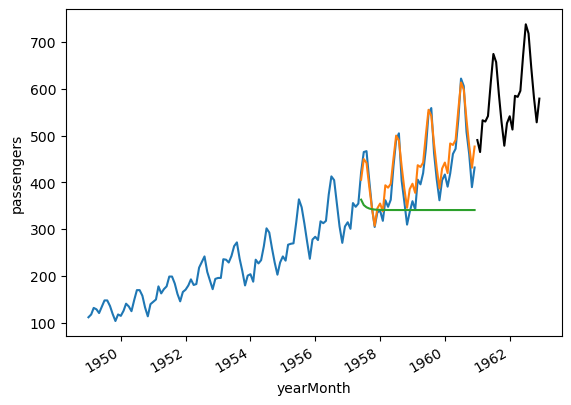

In [59]:

airP.dropna()
sns.lineplot(data=airP,x=airP.index,y='passengers')
sns.lineplot(data=airP,x=airP.index,y='sarimaxPred')
sns.lineplot(data=airP,x=airP.index,y='arimaPred')
model_fit.predict(start=futureDate.index[0],end=futureDate.index[-1]).plot(color='black')

In [60]:
checkDf = df[['passengers']]
checkDf['diff1'] = checkDf.diff()
# checkDf['diffInv'] = checkDf['diff1'].diffinv()
checkDf.head()

/tmp/ipykernel_20655/3576857084.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  checkDf['diff1'] = checkDf.diff()


,passengers,diff1
yearMonth,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0


In [ ]:
checkDf = df[['passengers']]
checkDf['diff1'] = checkDf.diff()
# checkDf['diffInv'] = checkDf['diff1'].diffinv()
checkDf.head()